<a href="https://colab.research.google.com/github/lohitha2004/netflix-clone/blob/main/clv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import classification_report

In [ ]:
df=pd.read_csv('/content/21_customer_lifetime_value.csv', encoding='latin-1')

In [ ]:
print(df.columns)

Index(['customer_id', 'purchase_history', 'tenure', 'total_spent', 'CLV'], dtype='object')


In [ ]:
df.head()



,customer_id,purchase_history,tenure,total_spent,CLV
0,C1000,39,37,1111.72,3427.80
1,C1001,29,36,8556.68,25670.04
2,C1002,15,24,5317.54,10635.08
3,C1003,43,31,8276.62,21381.27
4,C1004,8,6,3053.91,1526.96


In [ ]:
df.isnull().sum()

,0
customer_id,0
purchase_history,0
tenure,0
total_spent,0
CLV,0


In [ ]:
df.dropna(subset=['customer_id'], inplace=True)
df.head()

,customer_id,purchase_history,tenure,total_spent,CLV
0,C1000,39,37,1111.72,3427.80
1,C1001,29,36,8556.68,25670.04
2,C1002,15,24,5317.54,10635.08
3,C1003,43,31,8276.62,21381.27
4,C1004,8,6,3053.91,1526.96


In [ ]:
x=df[['purchase_history','tenure','total_spent']]
y=df['CLV']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
linear_model=LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred_lr_train=linear_model.predict(x_train)
y_pred_lr_test=linear_model.predict(x_test)

In [ ]:
rf_model=RandomForestRegressor(n_estimators=100,random_state=42)
rf_model.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred_rf_train=rf_model.predict(x_train)
y_pred_rf_test=rf_model.predict(x_test)

In [ ]:
print("Linear Regression")
print(f"Train R²:{r2_score(y_train,y_pred_lr_train):.2f}")
print(f"Test  R²:{r2_score(y_test,y_pred_lr_test):.2f}")
print(f"Test MAE:{mean_absolute_error(y_test,y_pred_lr_test):.2f}")
print(f"Test RMSE:{np.sqrt(mean_squared_error(y_test,y_pred_lr_test)):.2f}")

Linear Regression
Train R²:0.87
Test  R²:0.88
Test MAE:2987.89
Test RMSE:3956.13


In [ ]:
print("Random Forest Regressor")
print(f"Train R²:{r2_score(y_train, y_pred_rf_train):.2f}")
print(f"Test  R²:{r2_score(y_test, y_pred_rf_test):.2f}")
print(f"Test MAE:{mean_absolute_error(y_test, y_pred_rf_test):.2f}")
print(f"Test RMSE:{np.sqrt(mean_squared_error(y_test, y_pred_rf_test)):.2f}")

Random Forest Regressor
Train R²:1.00
Test  R²:1.00
Test MAE:354.46
Test RMSE:590.36


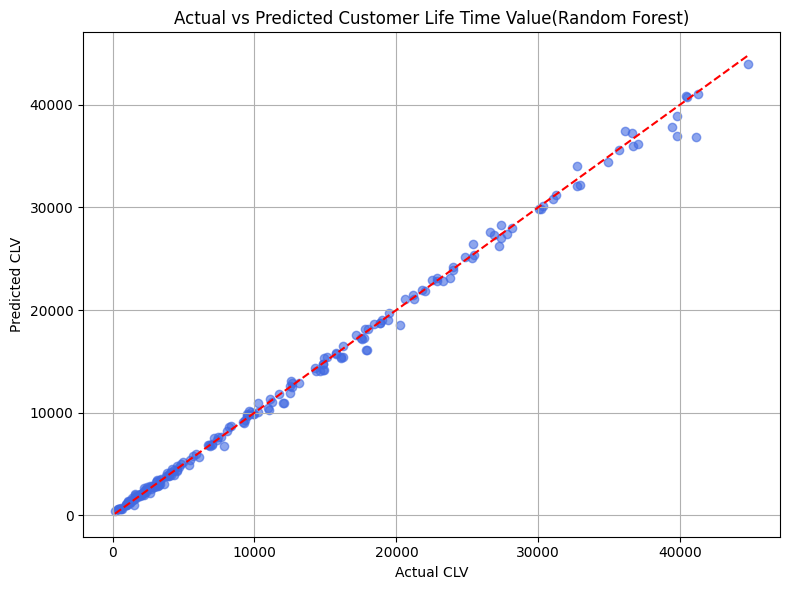

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred_rf_test,alpha=0.6,color='royalblue')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--')
plt.xlabel("Actual CLV")
plt.ylabel("Predicted CLV")
plt.title("Actual vs Predicted Customer Life Time Value(Random Forest)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
importances = rf_model.feature_importances_
features=x.columns
print("Feature Importances:")
for feature,importance in zip(features,importances):
    print(f"{feature}:{importance:.4f}")

Feature Importances:
purchase_history:0.0014
tenure:0.4903
total_spent:0.5083


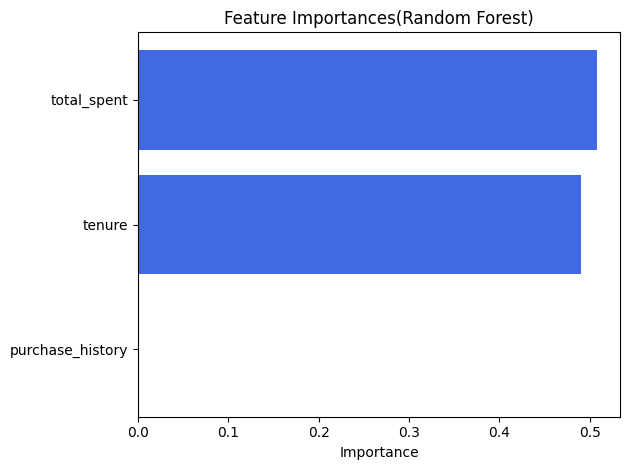

In [ ]:
plt.barh(features, importances, color='royalblue')
plt.xlabel("Importance")
plt.title("Feature Importances(Random Forest)")
plt.tight_layout()
plt.show()

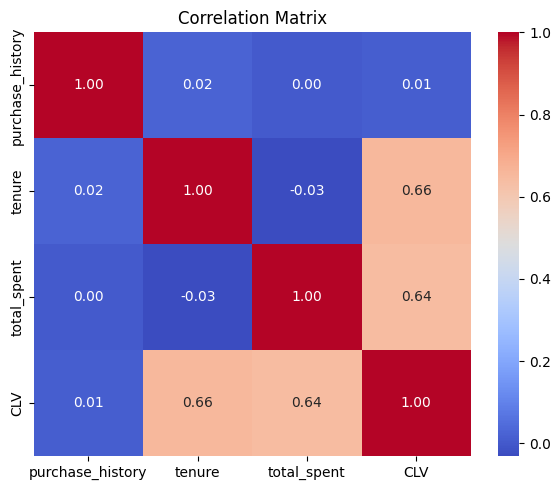

In [ ]:
import seaborn as sns
plt.figure(figsize=(6, 5))
sns.heatmap(df[['purchase_history','tenure','total_spent','CLV']].corr(),annot=True,cmap='coolwarm',fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

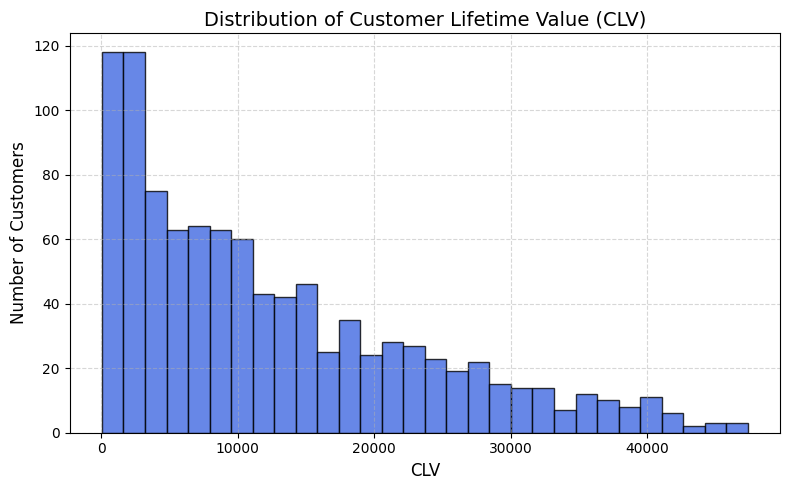

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(df['CLV'],bins=30,color='royalblue',edgecolor='black',alpha=0.8)
plt.title('Distribution of Customer Lifetime Value (CLV)',fontsize=14)
plt.xlabel('CLV',fontsize=12)
plt.ylabel('Number of Customers',fontsize=12)
plt.grid(True, linestyle='--',alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
def categorize(clv):
    if clv < 1000:
        return 0
    elif clv <= 5000:
        return 1
    else:
        return 2
y_test_class=y_test.apply(categorize)
y_pred_class=pd.Series(y_pred_rf_test).apply(categorize)

In [ ]:
print("Classification Report")
print(classification_report(y_test_class,y_pred_class,target_names=['Low','Medium','High']))

Classification Report
              precision    recall  f1-score   support

         Low       1.00      0.73      0.84        11
      Medium       0.95      0.97      0.96        71
        High       0.98      0.99      0.99       118

    accuracy                           0.97       200
   macro avg       0.98      0.90      0.93       200
weighted avg       0.97      0.97      0.97       200



In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test_class, y_pred_class)
print("Confusion Matrix")
print(confusion_matrix)

Confusion Matrix
[[  8   3   0]
 [  0  69   2]
 [  0   1 117]]


Text(0, 0.5, 'Actual')

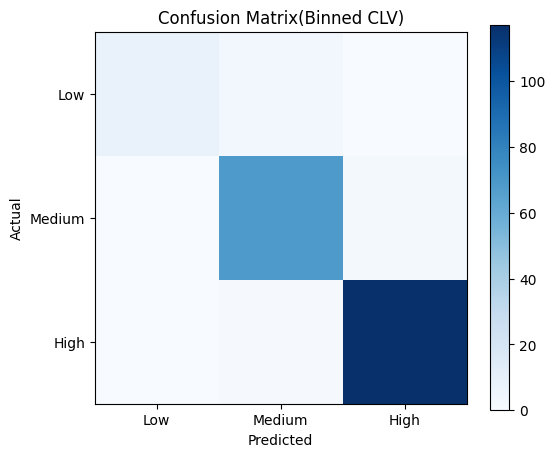

In [ ]:
plt.figure(figsize=(6,5))
plt.imshow(confusion_matrix,cmap='Blues')
plt.title("Confusion Matrix(Binned CLV)")
plt.colorbar()
classes=['Low','Medium','High']
tick_marks=np.arange(len(classes))
plt.xticks(tick_marks,classes)
plt.yticks(tick_marks,classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")

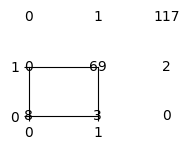

In [ ]:
for i in range(len(confusion_matrix)):
    for j in range(len(confusion_matrix[0])):
        plt.text(j,i,confusion_matrix[i][j],ha='center',va='center',color='black')

plt.tight_layout()
plt.show()